In [1]:
# 2. Project Title:
# Heart Disease Detection using Classification Algorithms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"/content/heart_disease_Capstone_Project-2_dataset.csv")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1


In [3]:
df.shape

(400, 14)

In [4]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'heart_disease'],
      dtype='object')

In [5]:
df.dtypes

,0
age,int64
sex,int64
chest_pain_type,int64
resting_blood_pressure,int64
cholesterol,int64
fasting_blood_sugar,int64
resting_ecg,int64
max_heart_rate,int64
exercise_induced_angina,int64
st_depression,float64


In [6]:
df.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholesterol,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_induced_angina,0
st_depression,0


In [7]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,53.667500,0.662500,1.712500,123.630000,216.627500,0.140000,0.530000,146.717500,0.29250,0.753250,1.177500,0.677500,1.925000,0.555000
std,8.508403,0.473449,1.035628,16.567114,41.379941,0.347422,0.533678,21.104293,0.45548,0.772841,0.645784,0.889084,0.689611,0.497588
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,91.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,112.000000,188.000000,0.000000,0.000000,132.000000,0.00000,0.200000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,2.000000,124.000000,216.000000,0.000000,1.000000,146.000000,0.00000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,59.000000,1.000000,3.000000,135.000000,246.000000,0.000000,1.000000,161.000000,1.00000,0.900000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,174.000000,336.000000,1.000000,2.000000,202.000000,1.00000,4.900000,2.000000,3.000000,3.000000,1.000000


In [8]:
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=5000)
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7
Precision: 0.7894736842105263
Recall: 0.6521739130434783
F1 Score: 0.7142857142857143

Confusion Matrix:
 [[26  8]
 [16 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.76      0.68        34
           1       0.79      0.65      0.71        46

    accuracy                           0.70        80
   macro avg       0.70      0.71      0.70        80
weighted avg       0.72      0.70      0.70        80



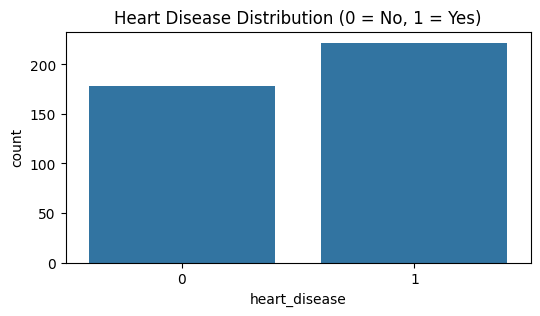

In [13]:
import seaborn as sns

plt.figure(figsize=(6,3))
sns.countplot(x='heart_disease', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini",max_depth=2,random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [15]:
y_pred = dt.predict(X_test)
print("Predictions on test set:")
y_pred

Predictions on test set:


array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred ,zero_division=0)
print("Classification Report:\n", report)

Accuracy: 0.575
Confusion Matrix:
 [[24 10]
 [24 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.71      0.59        34
           1       0.69      0.48      0.56        46

    accuracy                           0.57        80
   macro avg       0.59      0.59      0.57        80
weighted avg       0.61      0.57      0.57        80



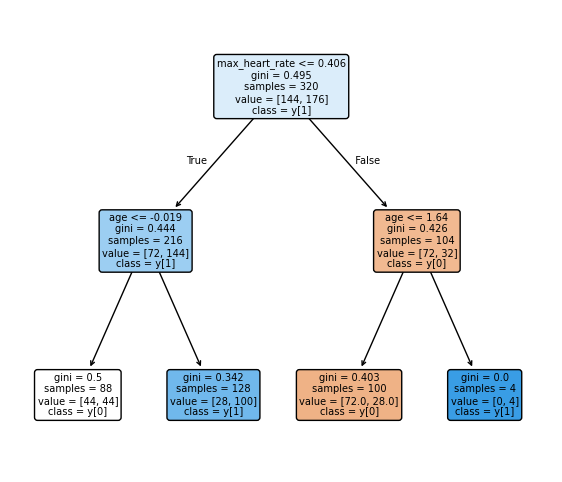

                    Feature  Importance
7            max_heart_rate    0.596515
0                       age    0.403485
1                       sex    0.000000
3    resting_blood_pressure    0.000000
2           chest_pain_type    0.000000
4               cholesterol    0.000000
5       fasting_blood_sugar    0.000000
6               resting_ecg    0.000000
8   exercise_induced_angina    0.000000
9             st_depression    0.000000
10                 st_slope    0.000000
11        num_major_vessels    0.000000
12              thalassemia    0.000000


In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(7, 6))
plot_tree(dt, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.show()

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
print("Number of trees:", rf.n_estimators)
print("Number of features:", X_train.shape[1])

Number of trees: 100
Number of features: 13


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.625
Confusion Matrix:
 [[17 17]
 [13 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53        34
           1       0.66      0.72      0.69        46

    accuracy                           0.62        80
   macro avg       0.61      0.61      0.61        80
weighted avg       0.62      0.62      0.62        80



In [21]:
rf_tuned = RandomForestClassifier(n_estimators=200, max_depth=10, criterion="entropy", random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))

Tuned Accuracy: 0.6


In [22]:
from sklearn.svm import SVC

SVC_model = SVC(kernel='rbf', random_state=42)
SVC_model.fit(X_train, y_train)

SVC(random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred = SVC_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.675
Precision: 0.717391304347826
Recall: 0.717391304347826
F1 Score: 0.717391304347826

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62        34
           1       0.72      0.72      0.72        46

    accuracy                           0.68        80
   macro avg       0.67      0.67      0.67        80
weighted avg       0.68      0.68      0.68        80



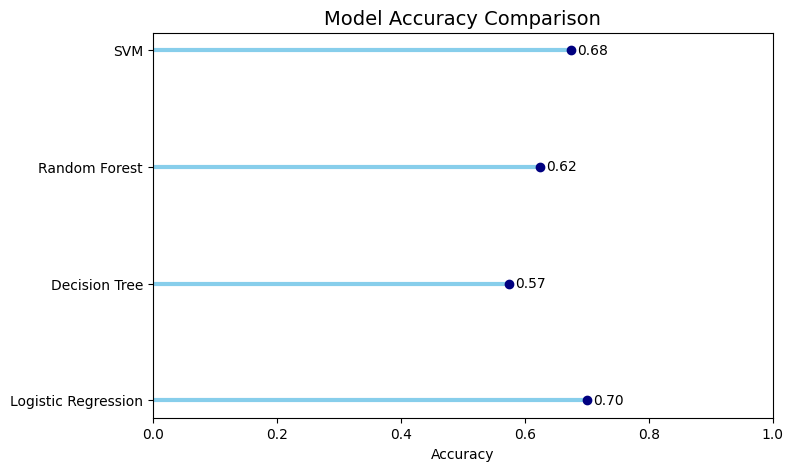

In [24]:
import matplotlib.pyplot as plt
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracy = [0.7,0.575,0.625 ,0.675]

plt.figure(figsize=(8,5))
plt.hlines(y=models, xmin=0, xmax=accuracy, color='skyblue', linewidth=3)
plt.plot(accuracy, models, "o", color='navy')
for i, acc in enumerate(accuracy):
    plt.text(acc + 0.01, models[i], f"{acc:.2f}", va='center', fontsize=10)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Accuracy')
plt.xlim(0, 1)
plt.show()

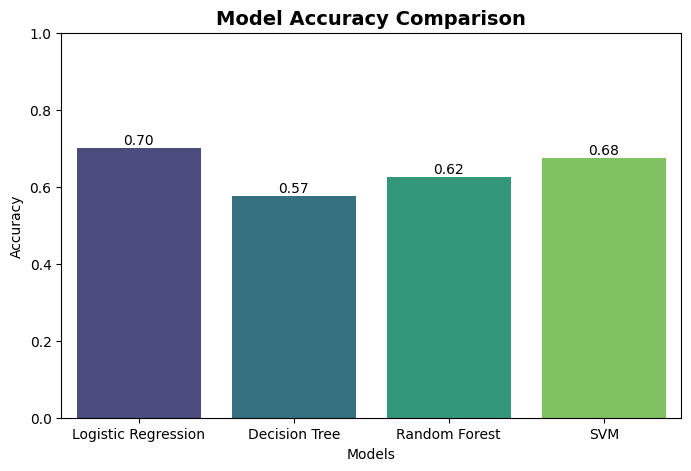

In [25]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'Model': models, 'Accuracy': accuracy})

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Model', y='Accuracy', hue='Model', palette='viridis', legend=False)
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(df['Accuracy']):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)
plt.show()

In [27]:
print("By comparing multiple classification algorithms Logistic Regression was found as best model based on accuracy and Classification Report")
best_model = LR_model

By comparing multiple classification algorithms Logistic Regression was found as best model based on accuracy and Classification Report


In [28]:
import pickle
import json
# Model saving
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open('feature_columns.json', "w") as f:
    json.dump(X.columns.tolist(), f)

print("Model, scaler, and feature columns saved.")

Model, scaler, and feature columns saved.
